___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# RNN (Time Series)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [2]:
df = pd.read_csv('../data&resources/RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [5]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

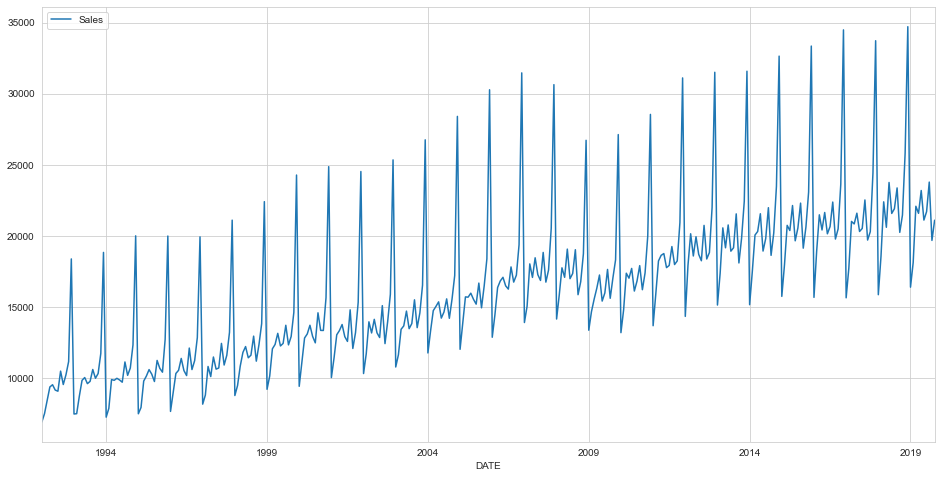

In [6]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [7]:
len(df)

334

In [8]:
test_size = 24

In [9]:
test_ind = len(df)- test_size
test_ind

310

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [12]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


### Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# help(TimeseriesGenerator)

In [18]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [19]:
len(generator)

298

In [20]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [21]:
X, y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


## Modelling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [24]:
n_features = train_scaled.shape[1]

In [25]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*32+(32**2))

4352

In [28]:
4 * ((32+1)*16+(16**2))

3136

### EarlyStopping and Validation Generator

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [31]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [32]:
len(validation_generator)

12

In [33]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 13s 19ms/step - loss: 0.0222 - val_loss: 0.0361
Epoch 2/20
298/298 [==============================] - 4s 12ms/step - loss: 0.0197 - val_loss: 0.0382
Epoch 3/20
298/298 [==============================] - 4s 12ms/step - loss: 0.0194 - val_loss: 0.0267
Epoch 4/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0181 - val_loss: 0.0294
Epoch 5/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0162 - val_loss: 0.0247
Epoch 6/20
298/298 [==============================] - 3s 11ms/step - loss: 0.0164 - val_loss: 0.0375
Epoch 7/20
298/298 [==============================] - 3s 12ms/step - loss: 0.0167 - val_loss: 0.0257
Epoch 8/20
298/298 [==============================] - 5s 16ms/step - loss: 0.0139 - val_loss: 0.0192
Epoch 9/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0138 - val_loss: 0.0275
Epoch 10/20
298/298 [==============================] - 4s 13ms/step - loss: 0.0126 - val_l

<AxesSubplot:>

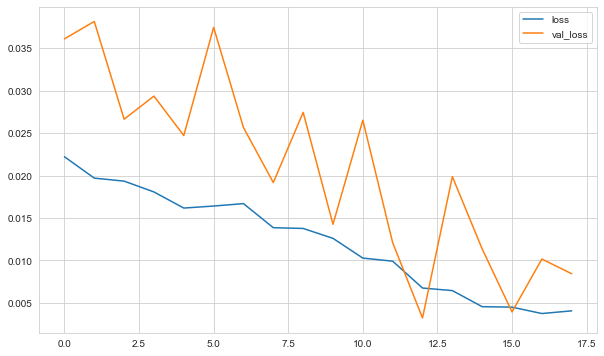

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [37]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [38]:
predictions_scaled

[array([0.582714], dtype=float32),
 array([0.78833985], dtype=float32),
 array([0.3446653], dtype=float32),
 array([0.41214722], dtype=float32),
 array([0.4814337], dtype=float32),
 array([0.47753483], dtype=float32),
 array([0.48078257], dtype=float32),
 array([0.4512664], dtype=float32),
 array([0.4593258], dtype=float32),
 array([0.47181666], dtype=float32),
 array([0.42137343], dtype=float32),
 array([0.46214837], dtype=float32)]

In [39]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6300043786104159 
mae: 0.07622855486378388 
mse: 0.008194450439270693 
rmse: 0.09052320387210504


### Inverse Transformations and Comparing

In [40]:
predictions = scaler.inverse_transform(predictions_scaled)

In [41]:
compare = test[:12]

In [42]:
compare['Predictions'] = predictions

In [43]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,22988.275
2017-12-01,33720,28652.033
2018-01-01,15881,16431.461
2018-02-01,18585,18290.183
2018-03-01,22404,20198.610
2018-04-01,20616,20091.219
2018-05-01,23764,20180.675
2018-06-01,21589,19367.682
2018-07-01,21919,19589.670


<AxesSubplot:xlabel='DATE'>

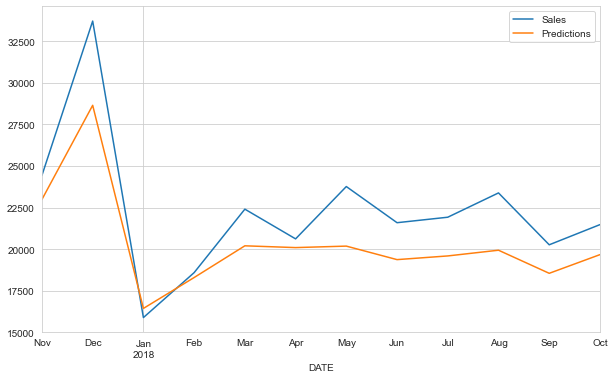

In [44]:
compare.plot()

In [45]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.6300043786104151 
mae: 2099.639315168066 
mse: 6216899.579217561 
rmse: 2493.371127453264


## Retrain and Forecasting

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [47]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [48]:
len(df)

334

In [49]:
len(generator)

322

In [50]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 13s 11ms/step - loss: 0.0253
Epoch 2/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0197
Epoch 3/15
322/322 [==============================] - 3s 9ms/step - loss: 0.0176
Epoch 4/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0172
Epoch 5/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0158
Epoch 6/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0161
Epoch 7/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0138: 1s - - ETA: 0s - los
Epoch 8/15
322/322 [==============================] - 3s 10ms/step - loss: 0.0153
Epoch 9/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0171
Epoch 10/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0115
Epoch 11/15
322/322 [==============================] - 4s 12ms/step - loss: 0.0110
Epoch 12/15
322/322 [==============================] - 4s 12ms/step - loss

In [51]:
scaled_full_data.shape

(334, 1)

In [52]:
scaled_full_data[-length:].shape

(12, 1)

In [53]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [54]:
forecast = scaler.inverse_transform(forecast)

In [55]:
forecast

array([[26134.25937986],
       [30541.52502203],
       [17557.05377793],
       [18956.92175317],
       [20724.9120183 ],
       [20512.99078059],
       [21002.74214411],
       [19797.37889814],
       [20075.81647158],
       [20588.13533521],
       [18715.82907462],
       [20484.16656995]])

In [56]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [57]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [58]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [59]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [60]:
forecast_df

,Forecast
2019-11-01,26134.259
2019-12-01,30541.525
2020-01-01,17557.054
2020-02-01,18956.922
2020-03-01,20724.912
2020-04-01,20512.991
2020-05-01,21002.742
2020-06-01,19797.379
2020-07-01,20075.816
2020-08-01,20588.135


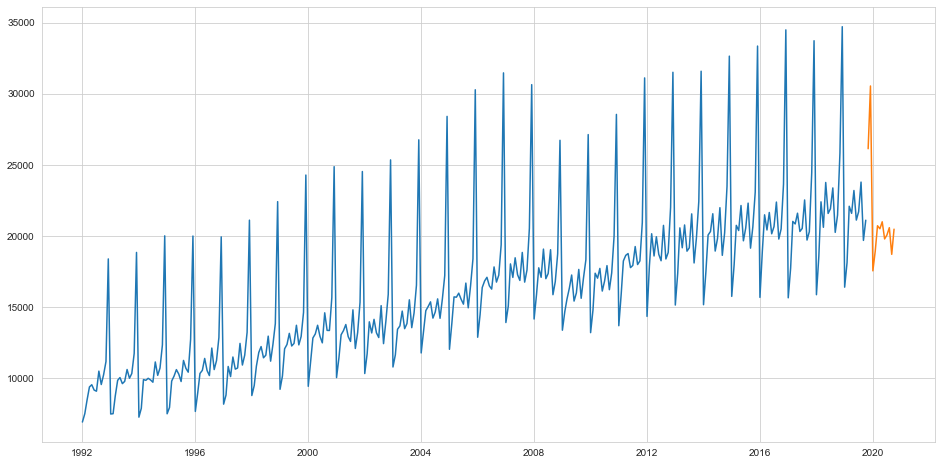

In [61]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

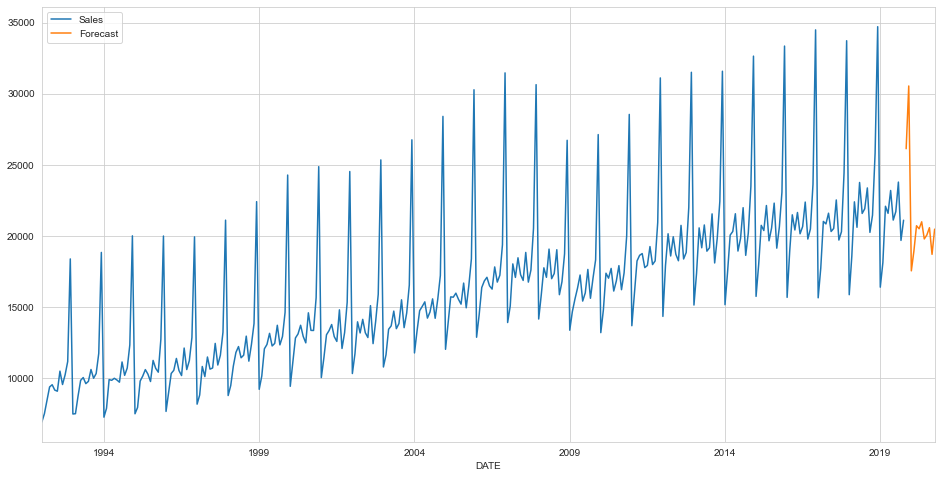

In [62]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

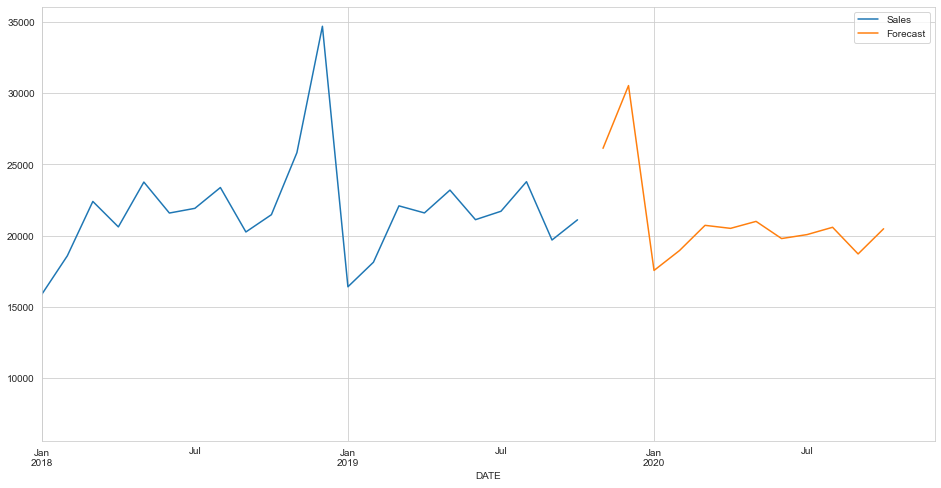

In [63]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___